# EDA Flight-Etiquete
### 1) Ingest data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../../Data/flight/flying-etiquette.csv", index_col='RespondentID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040 entries, 3436139758 to 3431729581
Data columns (total 26 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   How often do you travel by plane?                                                                                                         1040 non-null   object
 1   Do you ever recline your seat when you fly?                                                                                               858 non-null    object
 2   How tall are you?                                                                                                                         858 non-null    object
 3   Do you have any children under 18?              

### 2) Data Prep

In [4]:
#Handling hiehgt column
df['Height(inches)'] = df['How tall are you?']

#func to convert height to total inches
def height_to_inches(height):
    if pd.isna(height):
        return np.nan
    if height == "Under 5 ft.":
        return 5 * 12
    if "and above" in height:
        return 6 * 12 + 6
    feet, inches = height.split("'")
    return int(feet) * 12 + int(inches.strip('"'))

#convert heights
df['Height(inches)'] = df['Height(inches)'].apply(height_to_inches)
df['Height(inches)'].head(5)

RespondentID
3436139758     NaN
3434278696    75.0
3434275578    68.0
3434268208    71.0
3434250245    67.0
Name: Height(inches), dtype: float64

In [5]:
#Checking duplicates, 29 found
df = df.drop_duplicates()

In [28]:
#Null handling, most columns have 50-60, one with 90, drop goes from 1040 rows to 687
#df = df.dropna()

## 3) Analysis

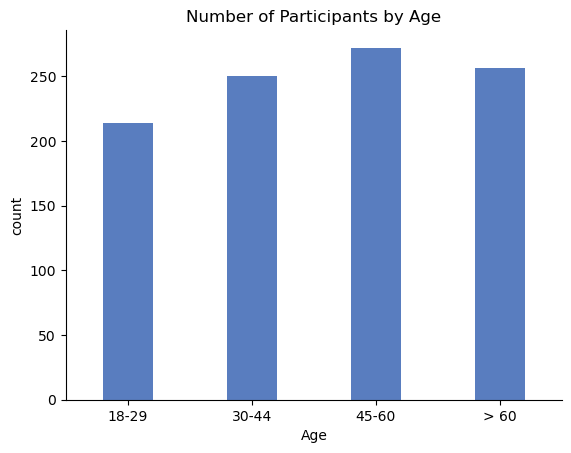

In [8]:
#responders age analysis
sns.countplot(data=df, 
            x= 'Age', 
            color='#4878d0', 
            order=['18-29', '30-44', '45-60', '> 60'],
            width=0.4)

plt.title("Number of Participants by Age")
sns.despine()

#### From this data we can see that the majority of survey takers are in the older age range, with 18-29 as the lowest of the group.

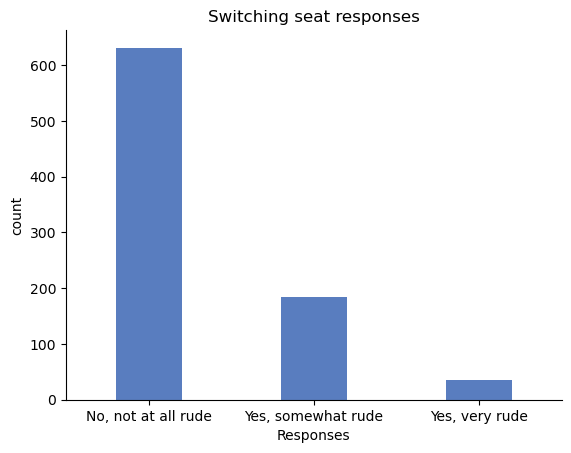

In [70]:
# Switch seat analysis
sns.countplot(data=df, 
            x= 'Is it rude to ask someone to switch seats with you in order to be closer to friends?', 
            color='#4878d0', 
            order=['No, not at all rude', 'Yes, somewhat rude', 'Yes, very rude'],
            width=0.4)

plt.title("Switching seat responses")
plt.xlabel("Responses")
sns.despine()

#### From this data, the overwhelming majority feel that it is not rude to ask to switch.

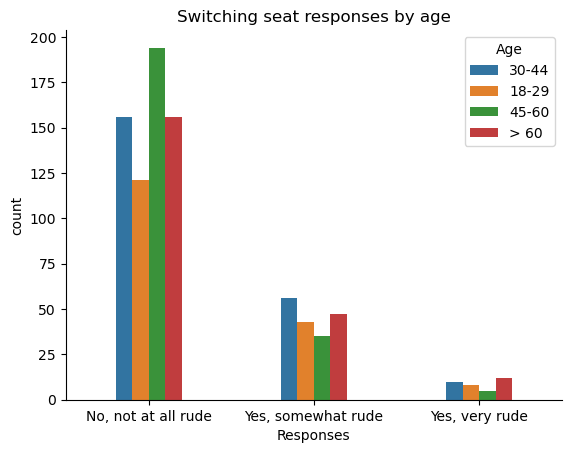

In [72]:
# Adding age to the previous
sns.countplot(data=df, 
            x= 'Is it rude to ask someone to switch seats with you in order to be closer to friends?', 
            hue='Age',
            #palette='dark:#4878d0', 
            order=['No, not at all rude', 'Yes, somewhat rude', 'Yes, very rude'],
            width=0.4)

plt.title("Switching seat responses by age")
plt.xlabel("Responses")
sns.despine()

#### It appears that there is no obvious trend of age to response, other than perhaps the younger group was the least of the No responses, but they aren't the highest of the others as well. I don't believe there is a major connection between them.

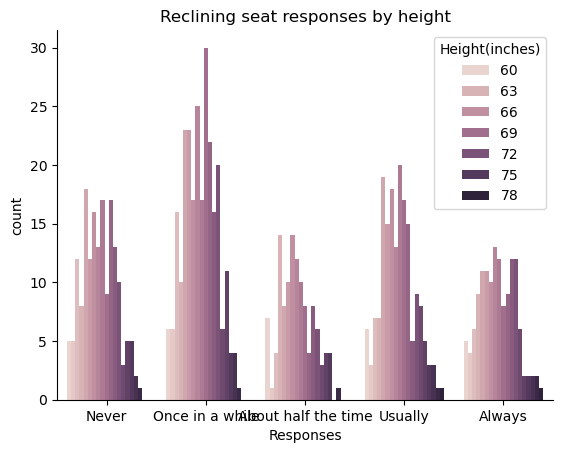

In [80]:
# Create the plot with height as hue
sns.countplot(data=df, 
               x='Do you ever recline your seat when you fly?', 
               hue='Height(inches)', 
               order=['Never', 'Once in a while', 'About half the time', 'Usually', 'Always'])

# Set the title and labels
plt.title("Reclining seat responses by height")
plt.xlabel("Responses")
sns.despine()

#### With this, it is ironically clear that the tallest people are the least inclined to recline. Though their answers are spread through the responses somewhat evenly, and in limited numbers for being in the extremes of the dataset, they are overshadowed by the other heights. With 66-70 seemingly being the most to occasionally or frequently recline.